**B03 Team Members:**   Himani Tyagi,    Jaishankar Govindaraj,    Leonardo Trucios Cevasco,    Srithijaa Sankepally,    Yumeng (Emelyn) Tang

# **Summary of the Assignment**

**Project title :** Global Pandemic And The Government - COVID-19’s Impact On Boston Government Employees’ Earnings

**Problem Definition:** Evaluate the Boston government sector to understand the impact of the global pandemic, COVID-19, on the employees’ earnings.

1. Examine the data across years preceding, during, and following the pandemic to assess whether there have been any effects on both earnings and the workforce.
2. Explore which job levels/positions have recorded the highest earnings, and which department have recorded the highest number of employees
Determine which income component has the most impact on an employee’s gross earnings.
3. Construct patterns from data collected across various Boston areas/zip codes.

**Data source :** Boston Government - Office of Human Resources :
  1. https://data.boston.gov/dataset/employee-earnings-report

**Motivation :** Government jobs tend to be secure because they are essential for the functioning of society and are less influenced by market fluctuations compared to private sector. We aim to provide insights into Boston’s government sector for our peers with potential interest.

# **Exploring the datasets**




We have multiple tables as part of our dataset, one for each year starting 2011 to 2022. We will be using the data from 2018 - 2022 to fit our problem definition and focus on the years around the COVID - 19 pandemic.


# Description for Data Information Columns

The description of the columns in the dataset is as follows:

*   **Name** :

*  **Department_Name** :

*   **Title** :

*   **Regular** :  

*   **Retro** :

*   **Other** :

*   **Overtime** :

*   **Injured** :

*   **Detail** :

*   **Quinn Education** :

*   **Total Gross** :

*   **Postal** :

The dataset includes information about:**(change this)**

* State and Year wise information about Real GDP, Real Personal Income and Real Personal Consumption Expenditure, Disposable Personal Income, Per Capita Income and Expenditure
* State and Year wise information about the Regional Price Parities, Implicit Regional Price Deflator
* State and Year wise Number of jobs

Basic Information

* There are a total of XXX rows
* There are a total of XX columns
* There are XXX null values

# **Libraries required**

In [ ]:
#importing all packages needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import json
import plotly.express as px
from scipy.stats import linregress
import geopandas as gpd
import requests
from math import pi
from bokeh.plotting import figure, show
from bokeh.transform import cumsum

# **Reading the Business Dynamics Statistics across States (1978 - 2021) dataset**

In [ ]:
#Reading the datasets using pandas
dfa = pd.read_excel('https://github.com/ltrucios/BA780_GroupAssigment_Group09/raw/main/Datasets/BDSTIMESERIES.BDSGEO-2023-09-20T171054.xlsx', sheet_name = 'Data')

In [ ]:
#Printing first 5 rows of the first dataset
dfa.head()

Geographic Area Name 2017 NAICS Code  Meaning of NAICS Code  \
0        United States              00  Total for all sectors   
1        United States              00  Total for all sectors   
2        United States              00  Total for all sectors   
3        United States              00  Total for all sectors   
4        United States              00  Total for all sectors   

  Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator  \
0                                              Total                                             
1                                              Total                                             
2                                              Total                                             
3                                              Total                                             
4                                              Total                                             

   Year Number of firms Number of establishments Number of employees  \
0  1978       3,558,241                4,324,780          69,968,366   
1  1979       3,691,332                4,484,523          74,428,886   
2  1980       3,739,132                4,553,278          74,885,222   
3  1981       3,768,026                4,613,001          75,559,277   
4  1982       3,741,519                4,616,580          74,700,325   

  (DHS) denominator Number of establishments born during the last 12 months  \
0        67,389,489                                            640,222        
1        72,294,786                                            616,164        
2        74,648,671                                            579,032        
3        75,212,259                                            585,422        
4        75,072,645                                            571,755        

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  Number of jobs lost from closing establishments during the last 12 months  \
0                                          3,562,965                          
1                                          3,252,738                          
2                                          3,412,436                          
3                                          3,488,530                          
4                                          3,830,911                          

  Number of jobs lost from contracting establishments during the last 12 months  \
0                                          5,505,098                              
1                                          6,146,491                              
2                                          7,890,393                              
3                                          7,894,587                              
4                                          8,694,981                              

  Rate of jobs lost from closing establishments during the last 12 months  \
0                                              5.287                        
1                                              4.499                        
2                                              4.571                        
3                                              4.638                        
4                                              5.103                        

  Rate of jobs lost from contracting and closing establishments during the last 12 months  \
0                                             13.456                                        
1                                             13.001                                        
2                                             15.141                                        
3                                             15.135                                        
4                                             16.685                                        

  Number of net jobs created from expanding/contracting a

# **Sanity check of Data**


In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44720 entries, 0 to 44719
Data columns (total 29 columns):
 #   Column                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                              --------------  ----- 
 0   Geographic Area Name                                                                                                44720 non-null  object
 1   2017 NAICS Code                                                                                                     44720 non-null  object
 2   Meaning of NAICS Code                                                                                               44720 non-null  object
 3   Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator                        44720 non-null  object
 4   Year                  

In [ ]:
dfa.shape

(44720, 29)

Seems like there are no missing values in the data set.
But a lot of columns are set as objects which is not the best case for analysis. So we tried to transform them into floats upon which we encountered that there are some string values within a few columns.

We'll be transforming these values to Nan as the frequency of these values is very small(negligable).

Also, some columns have negative integers but the '-' symbol is in the format of unicode minus and we'll have to transform it to regular '-'.

In [ ]:
#Replacing values with nan
dfa=dfa.replace('D',np.nan)
dfa=dfa.replace('S',np.nan)

In [ ]:
#Replacing '-' values with proper minus symbol
dfa['Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months']=dfa['Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months'].str.replace("−","-")
dfa['Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months']=dfa['Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months'].str.replace(',', '').astype(str).astype(float)

dfa['Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months']=dfa['Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months'].str.replace("−","-")
dfa['Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months']=dfa['Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months'].str.replace(',', '').astype(str).astype(float)

In [ ]:
#Creating a df_columns for columns of the dfa
dfa_columns=dfa.columns

#Converting to list
dfa_columns=list(dfa_columns)

#Considering columns with numerical values
dfa_columns=dfa_columns[5:]

#Removing all commas in the text and converting to float
for i in dfa_columns:
  if dfa[i].dtype==str:
    dfa[i]=dfa[i].str.replace(',', '').astype(str).astype(float)
  if dfa[i].dtype==object:
    dfa[i]=dfa[i].str.replace(',', '').astype(str).astype(float)

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44720 entries, 0 to 44719
Data columns (total 29 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Geographic Area Name                                                                                                44720 non-null  object 
 1   2017 NAICS Code                                                                                                     44720 non-null  object 
 2   Meaning of NAICS Code                                                                                               44720 non-null  object 
 3   Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator                        44720 non-null  object 
 4   Year            

Upon transforming the columns into floats and replacing strings in a few a columns which are irrelevant with Nan, we now have null values spread across.


# **Reading the GDP data across the States (1998 - 2022) dataset**

In [ ]:
dfb = pd.read_excel('https://github.com/ltrucios/BA780_GroupAssigment_Group09/raw/main/Datasets/GPD%20information%20-%20by%20state%20and%20year.xlsx', header = 1)
dfb.head()

Unnamed: 0     Unnamed: 1 Unnamed: 2  \
0  Bureau of Economic Analysis            NaN        NaN   
1                  State or DC            NaN        NaN   
2                          NaN            NaN        NaN   
3                      GeoFips        GeoName   LineCode   
4                        00000  United States        NaN   

               Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0                     NaN        NaN        NaN        NaN        NaN   
1                     NaN        NaN        NaN        NaN        NaN   
2                     NaN        NaN        NaN        NaN        NaN   
3             Description       1998       1999       2000       2001   
4  Real dollar statistics        NaN        NaN        NaN        NaN   

  Unnamed: 8 Unnamed: 9  ... Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22  \
0        NaN        NaN  ...         NaN         NaN         NaN         NaN   
1        NaN        NaN  ...         NaN         NaN         NaN         NaN   
2        NaN        NaN  ...         NaN         NaN         NaN         NaN   
3       2002       2003  ...        2013        2014        2015        2016   
4        NaN        NaN  ...         NaN         NaN         NaN         NaN   

  Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26 Unnamed: 27 Unnamed: 28  
0         NaN         NaN         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN         NaN         NaN  
3        2017        2018        2019        2020        2021        2022  
4         NaN         NaN         NaN         NaN         NaN         NaN  

[5 rows x 29 columns]

In [ ]:
#Droping the first 4 columns to set the right column names

df0 = dfb.drop(range(3))
df0.columns = df0.iloc[0]
df0 = df0.reset_index(drop=True)
df0 = df0.drop(0)
df0.head(10)

3  GeoFips        GeoName LineCode  \
1    00000  United States      NaN   
2    00000  United States        1   
3    00000  United States        2   
4    00000  United States        3   
5    00000  United States      NaN   
6    00000  United States        4   
7    00000  United States        5   
8    00000  United States        6   
9    00000  United States        7   
10   00000  United States      NaN   

3                                         Description       1998       1999  \
1                              Real dollar statistics        NaN        NaN   
2      Real GDP (millions of chained 2012 dollars) 1/   12045824   12623361   
3     Real personal income (millions of constant (...       (NA)       (NA)   
4     Real PCE (millions of constant (2012) dollar...       (NA)       (NA)   
5     Current dollar statistics (millions of dollars)        NaN        NaN   
6                        Gross domestic product (GDP)    9062817    9631172   
7                                     Personal income    7601594    8006585   
8                          Disposable personal income    6570164    6895701   
9                   Personal consumption expenditures  5877248.2  6283757.5   
10  Real per capita dollar statistics (constant 20...        NaN        NaN   

3        2000      2001       2002       2003  ...        2013        2014  \
1         NaN       NaN        NaN        NaN  ...         NaN         NaN   
2    13138035  13263417   13488357   13865519  ...    16553348    16932051   
3        (NA)      (NA)       (NA)       (NA)  ...  13999660.3  14549525.5   
4        (NA)      (NA)       (NA)       (NA)  ...  11211711.4  11515312.3   
5         NaN       NaN        NaN        NaN  ...         NaN         NaN   
6    10250952  10581929   10929108   11456450  ...    16843196    17550687   
7     8654561   9009842    9157682    9491393  ...    14189228    14969527   
8     7419311   7771915    8106499    8488947  ...    12515000    13187189   
9   6767179.3   7073801  7348940.8  7740749.4  ...  11363527.8  11847725.1   
10        NaN       NaN        NaN        NaN  ...         NaN         NaN   

3         2015        2016        2017        2018        2019        2020  \
1          NaN         NaN         NaN         NaN         NaN         NaN   
2     17390295    17680274    18076651    18609078    19036052    18509143   
3     15207440  15451718.3    15876254  16314204.8  16897074.2  17825584.2   
4   11892947.4  12187675.5  12478228.1  12837303.4  13092261.6  12700723.2   
5          NaN         NaN         NaN         NaN         NaN         NaN   
6     18206023    18695106    19477337    20533058    21380976    21060474   
7     15681233    16092713    16837337    17671054    18575467    19812171   
8     13743790    14136149    14790170    15598091    16379175    17577865   
9   12263476.3  12693265.6  13233608.6  13904979.5    14392721  14116165.7   
10         NaN         NaN         NaN         NaN         NaN         NaN   

3         2021        2022  
1          NaN         NaN  
2     19609812    20014128  
3   18412541.1        (NA)  
4   13754090.1        (NA)  
5          NaN         NaN  
6     23315081    25462722  
7     21288709  21804787.5  
8     18629289  18608076.5  
9   15902575.3        (NA)  
10         NaN         NaN  

[10 rows x 29 columns]

In [ ]:
df0.shape

(1105, 29)

In [ ]:
 # Eliminating all the blank spaces of this table
df0["Description"] = df0["Description"].str.strip()

Since we only need the Real GDP for our analysis.

In [ ]:

df_1 = df0[df0["Description"]=="Gross domestic product (GDP)"]
df_2 = df0[df0["Description"]=="Personal income"]

In [ ]:
print(df_1.shape)

(52, 29)


In [ ]:
# We have to transform all the years columns into 1, that will be named as years
# We will create a new column that we will name (Real GDP)
df_1= df_1.melt(id_vars=["GeoName"], value_vars=['1998','1999','2000','2001','2002','2003',
'2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013','2014','2015','2016',
'2017', '2018', '2019', '2020','2021','2022' ], var_name='Year', value_name='GDP')

df_2= df_2.melt(id_vars=["GeoName"], value_vars=['1998','1999','2000','2001','2002','2003',
'2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013','2014','2015','2016',
'2017', '2018', '2019', '2020','2021','2022' ], var_name='Year', value_name='Personal Income')


In [ ]:
df_2 = df_2.replace("(NA)", np.nan)
df_1 = df_1.replace("(NA)", np.nan)

In [ ]:
#Transforming the object columns into floats
df_1["GDP"] = df_1["GDP"].astype(float)
df_1["Year"] = df_1["Year"].astype(float)
df_2["Personal Income"] = df_2["Personal Income"].astype(float)
df_2["Year"] = df_1["Year"].astype(float)

In [ ]:
df_3 = df_1.merge(df_2, on = ["GeoName","Year"])
df_3.head(10)

GeoName    Year        GDP  Personal Income
0         United States  1998.0  9062817.0        7601594.0
1               Alabama  1998.0   110212.0          99847.7
2                Alaska  1998.0    24227.5          18136.0
3               Arizona  1998.0   143302.6         118042.9
4              Arkansas  1998.0    62396.7          55698.4
5            California  1998.0  1147520.4         959693.5
6              Colorado  1998.0   150330.0         123090.0
7           Connecticut  1998.0   145475.5         127302.1
8              Delaware  1998.0    37106.0          22497.4
9  District of Columbia  1998.0    54815.3          21547.5

In [ ]:
#Renaming the column name in coherence to the first dataset
df_3.columns = ['Geographic Area Name', 'Year', 'GDP', 'Personal Income' ]

In [ ]:
#Checking the description of the dataset
df_1.describe()

Year           GDP
count  1300.000000  1.300000e+03
mean   2010.000000  6.044562e+05
std       7.213878  2.244569e+06
min    1998.000000  1.484020e+04
25%    2004.000000  7.394568e+04
50%    2010.000000  1.857252e+05
75%    2016.000000  3.905732e+05
max    2022.000000  2.546272e+07

# **Merging the Datasets**
Now we have both the data sets cleaned and organized for the analyisis we wish to carry out. The next step is to merge these datasets for ease of analysis.

In [ ]:
#Merging the datasets
df_merged = dfa.merge(df_3, how="left",on=["Geographic Area Name", "Year"])

In [ ]:
#Sorting the data based on Years
df_merged.head(10).sort_values(by = "Year", ascending = False)

Geographic Area Name 2017 NAICS Code  Meaning of NAICS Code  \
9        United States              00  Total for all sectors   
8        United States              00  Total for all sectors   
7        United States              00  Total for all sectors   
6        United States              00  Total for all sectors   
5        United States              00  Total for all sectors   
4        United States              00  Total for all sectors   
3        United States              00  Total for all sectors   
2        United States              00  Total for all sectors   
1        United States              00  Total for all sectors   
0        United States              00  Total for all sectors   

  Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator  \
9                                              Total                                             
8                                              Total                                             
7                                              Total                                             
6                                              Total                                             
5                                              Total                                             
4                                              Total                                             
3                                              Total                                             
2                                              Total                                             
1                                              Total                                             
0                                              Total                                             

   Year  Number of firms  Number of establishments  Number of employees  \
9  1987        4223760.0                 5224152.0           85873073.0   
8  1986        4157297.0                 5111966.0           83759536.0   
7  1985        4072930.0                 4986768.0           81663525.0   
6  1984        4001109.0                 4904240.0           78677473.0   
5  1983        3830417.0                 4712558.0           73878887.0   
4  1982        3741519.0                 4616580.0           74700325.0   
3  1981        3768026.0                 4613001.0           75559277.0   
2  1980        3739132.0                 4553278.0           74885222.0   
1  1979        3691332.0                 4484523.0           74428886.0   
0  1978        3558241.0                 4324780.0           69968366.0   

   (DHS) denominator  Number of establishments born during the last 12 months  \
9         85225936.0                                           739998.0         
8         82648632.0                                           710295.0         
7         80193988.0                                           683370.0         
6         76196863.0                                           698787.0         
5         74274626.0                                           624766.0         
4         75072645.0                                           571755.0         
3         75212259.0                                           585422.0         
2         74648671.0                                           579032.0         
1         72294786.0                                           616164.0         
0         67389489.0                                           640222.0         

   ...  \
9  ...   
8  ...   
7  ...   
6  ...   
5  ...   
4  ...   
3  ...   
2  ...   
1  ...   
0  ...   

   Rate of jobs lost from closing establishments during the last 12 months  \
9                                              6.181                         
8                                              5.287                         
7                                              6.047                         
6                                              4.757              

In [ ]:
#Adding Regions
#Define a dictionary to map states to official U.S. regions
state_region_map = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'New Hampshire': 'Northeast',
    'Rhode Island': 'Northeast', 'Vermont': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast',
    'Pennsylvania': 'Northeast', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest',
    'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest',
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Delaware': 'South', 'Florida': 'South',
    'Georgia': 'South', 'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South',
    'District of Columbia': 'South', 'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South',
    'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arizona': 'West',
    'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West',
    'Wyoming': 'West', 'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West'}

#Apply the mapping to create a new 'Region' column
df_merged['Region'] = df_merged['Geographic Area Name'].map(state_region_map)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44720 entries, 0 to 44719
Data columns (total 32 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Geographic Area Name                                                                                                44720 non-null  object 
 1   2017 NAICS Code                                                                                                     44720 non-null  object 
 2   Meaning of NAICS Code                                                                                               44720 non-null  object 
 3   Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator                        44720 non-null  object 
 4   Year            

# **Trend Analysis**

Moving forward with the Analysis
we'll first try to plot charts to observe the corelation between important columns(Net Jobs Created, Real GDP, Number of Firms and Number of Employees) within the years 2000-2020.

With this approach we'll try to answer the following question.

**Question - What has been the behaviour of the Job Trends and Economy between 2000 and 2020 in the US?**

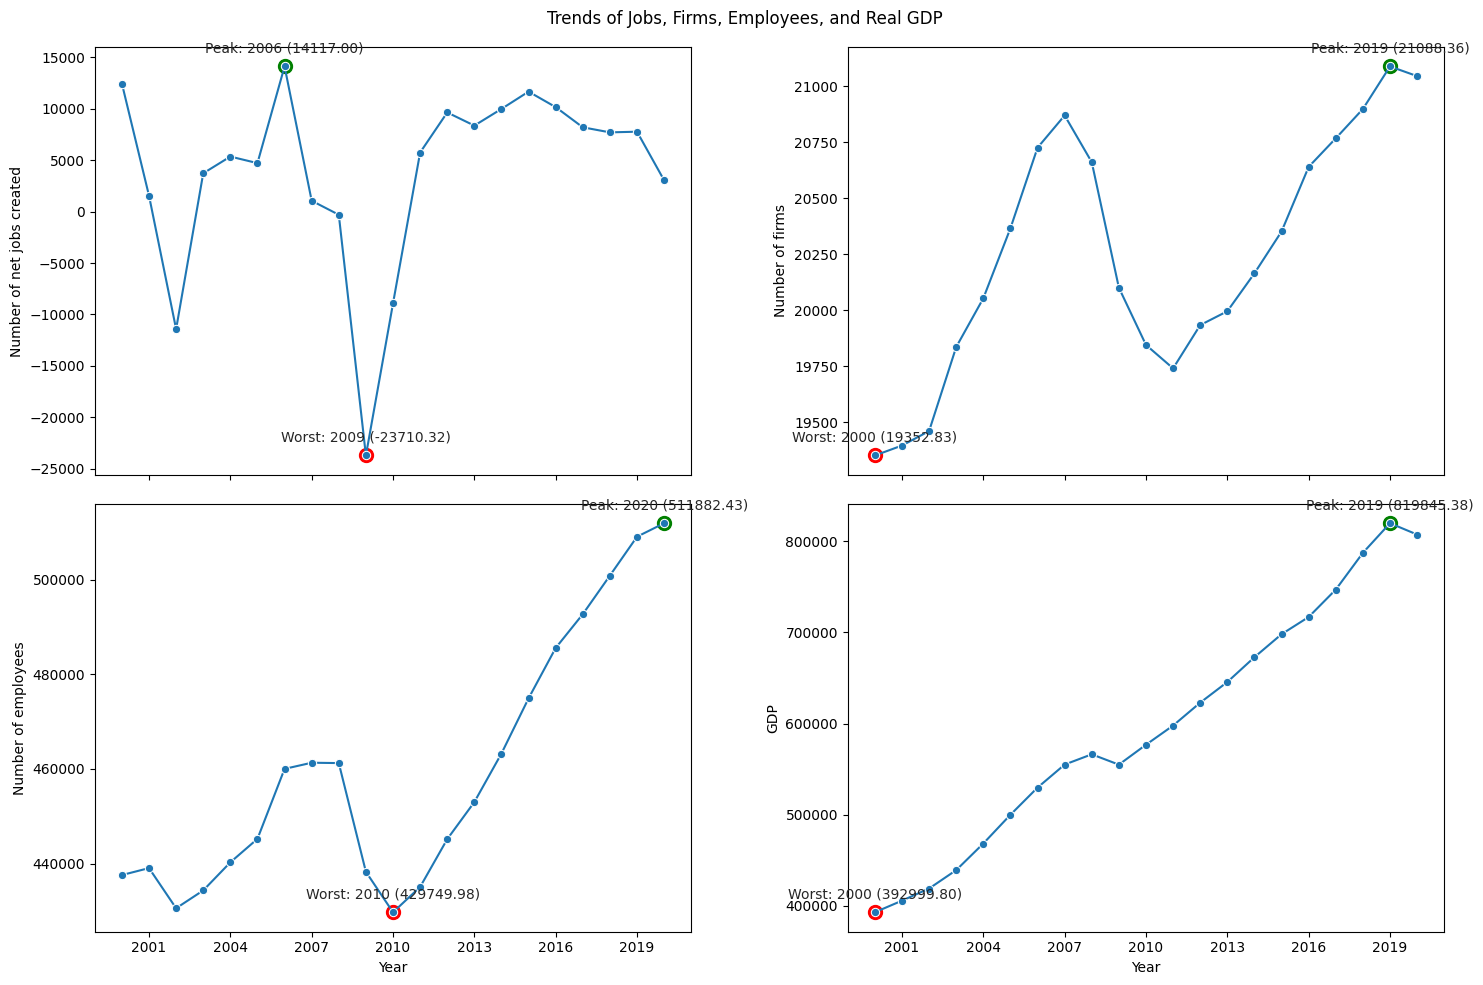

In [ ]:
#Exploring patterns within the years 2000-2020

# Choosing the years from 2000 to 2020
year_00_20 = df_merged[(df_merged["Year"] >= 2000) & (df_merged["Year"] <= 2020)]

# Plotting the trend of net jobs, number of firms, number of employees, and the Real GDP against the 20 years
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 10))
fig.suptitle('Trends of Jobs, Firms, Employees, and Real GDP')

sns.set_style('whitegrid')

# Plotting the data for each subplot
sns.lineplot(ax=axes[0][0], x='Year', y='Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months', data=year_00_20, errorbar=None, marker='o')
axes[0][0].set_ylabel('Number of net jobs created')

sns.lineplot(ax=axes[0][1], x='Year', y='Number of firms', data=year_00_20, errorbar=None, marker='o')

sns.lineplot(ax=axes[1][0], x='Year', y='Number of employees', data=year_00_20, errorbar=None, marker='o')

sns.lineplot(ax=axes[1][1], x='Year', y='GDP', data=year_00_20, errorbar=None, marker='o')

#Reference from ChatGPT
# Finding the peak and worst years for each subplot
for ax in axes.flat:
    data = ax.get_lines()[0].get_data()
    peak_idx = data[1].argmax()
    worst_idx = data[1].argmin()
    peak_year = int(data[0][peak_idx])
    peak_value = data[1][peak_idx]
    worst_year = int(data[0][worst_idx])
    worst_value = data[1][worst_idx]

    # Highlighting the peak and worst years with larger green and red dots
    ax.scatter(peak_year, peak_value, color='green', s=100)
    ax.scatter(worst_year, worst_value, color='red', s=100)
    ax.annotate(f'Peak: {peak_year} ({peak_value:.2f})', (peak_year, peak_value), textcoords="offset points", xytext=(0,10), ha='center')
    ax.annotate(f'Worst: {worst_year} ({worst_value:.2f})', (worst_year, worst_value), textcoords="offset points", xytext=(0,10), ha='center')

#Reference from ChatGPT
# Formating x-axis labels
for ax in axes.flat:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Displaying the plot
plt.tight_layout()
plt.show()



# **Insights from the subplots**

From the graph we find that there is a sharp dip in the years from 2008-2010 which is consistent with the 2008 Recession in the US.

The first impact of the recession was on the GDP followed by the jobs.

**Hence, answering the first question - Though the net jobs and economy have seen a dip during a few years, GDP, Number of firms and employees have grown compared to year 2000. But the number of net jobs introduced each year has not seen a good enough relative growth compared to year 2000**

Now further zooming in to the period of 2006 to 2012 to study the effect of 2008 Recession on various other features.

In [ ]:
#Zooming in to 2006-2012 period.
year_06_12 = df_merged[(df_merged["Year"]>=2006)&(df_merged["Year"]<=2012)]

# **Employment Volatility**
Moving forward with our analysis to answer the following question.

**Question - Which sectors were the least and most volatile in terms of jobs across the years which involve the recession?**
In other terms, which sectors were least and most affected by the recession.


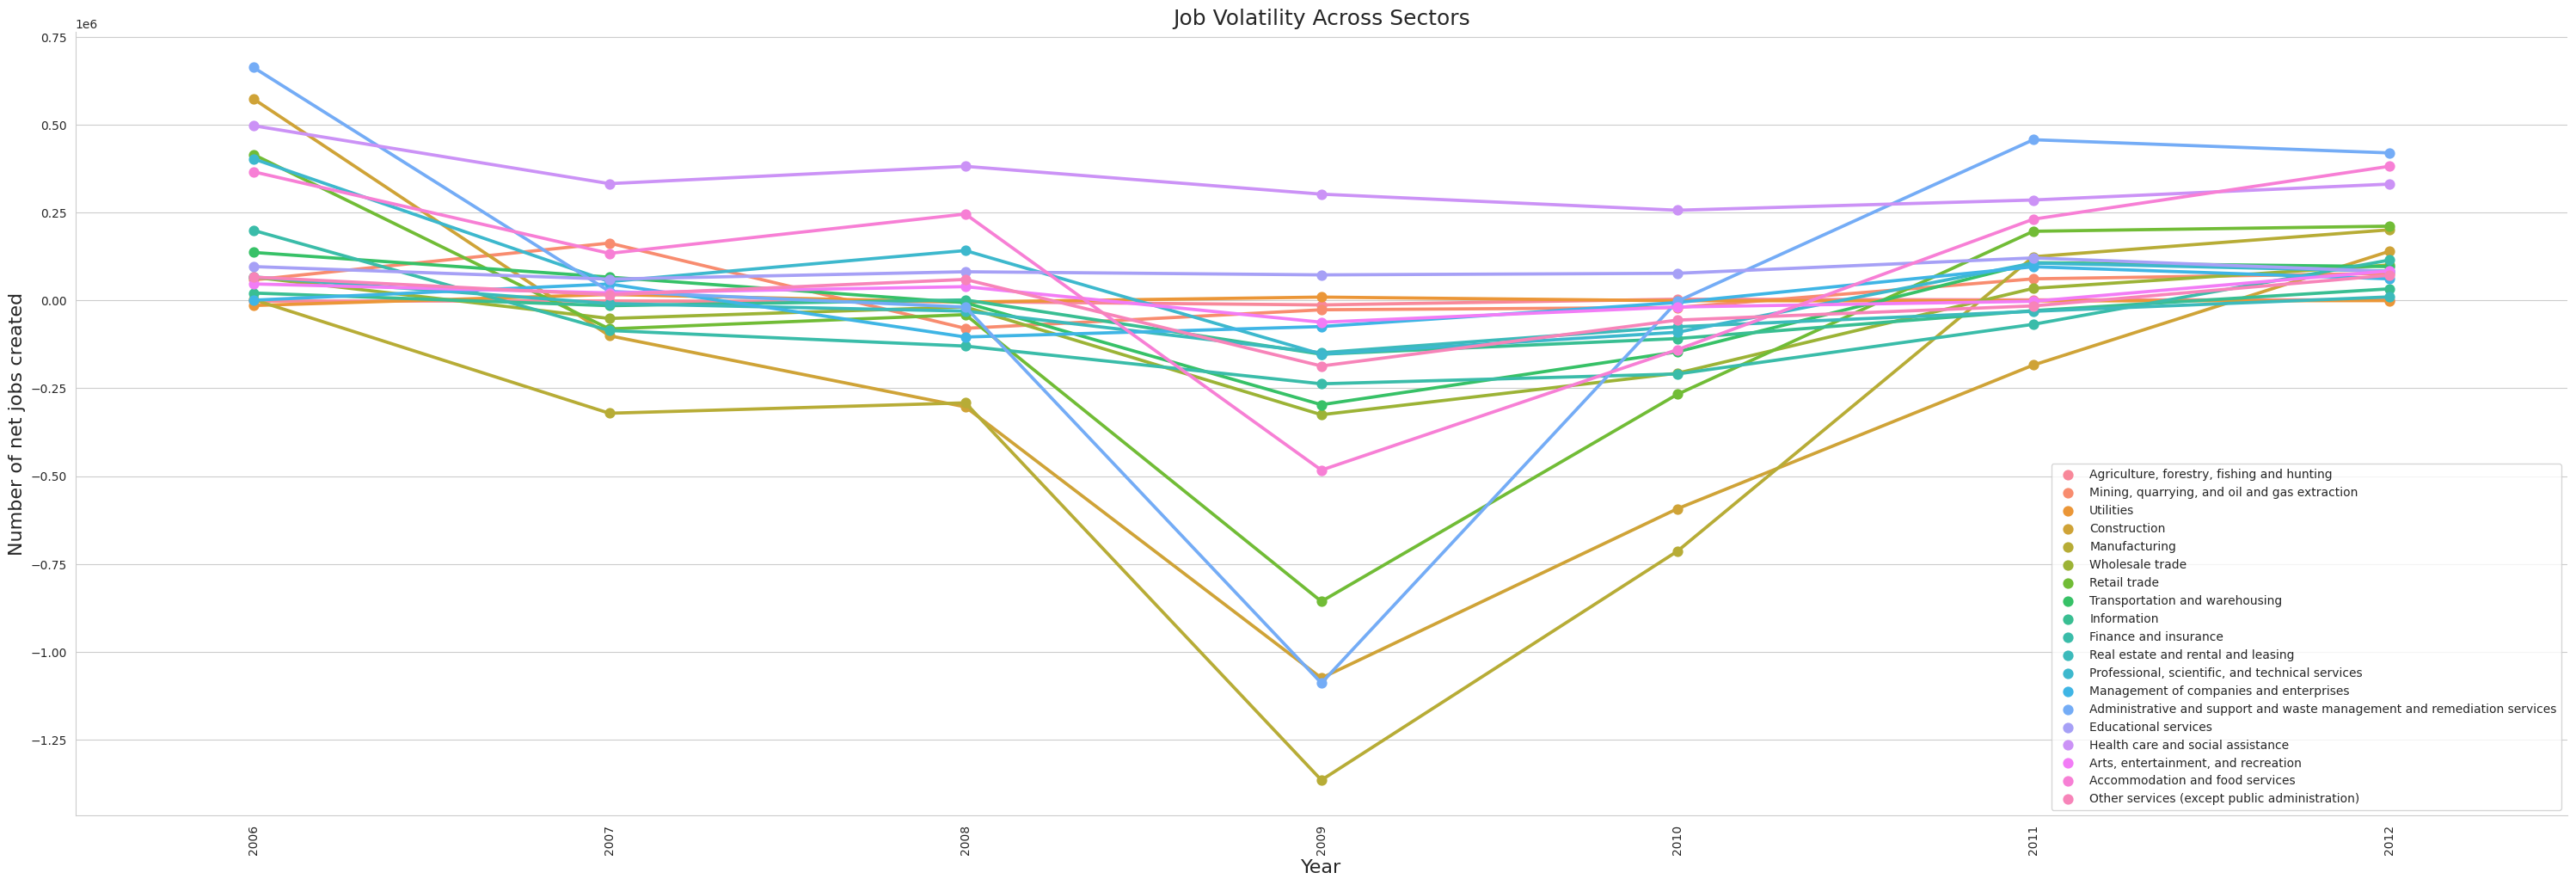

In [ ]:
df_jobs_effect=year_06_12[year_06_12["Geographic Area Name"] == "United States"]
df_jobs_effect=df_jobs_effect[df_jobs_effect['Meaning of NAICS Code']!='Total for all sectors']
df_jobs_effect_srt=df_jobs_effect.sort_values(by='Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months', ascending = False)
fig=sns.catplot(x='Year',
                y='Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months',
                data=df_jobs_effect,
                hue='Meaning of NAICS Code',
                kind='point', height=10,
                aspect=3,errorbar=None, legend=False);
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of net jobs created', fontsize=16)
plt.title("Job Volatility Across Sectors", fontsize=18)
fig.set_xticklabels(rotation=90);
fig.ax.legend(title="Sectors", fontsize=12, title_fontsize=14)
plt.legend(loc="lower right", bbox_to_anchor=(1,0));

# **Insights  from the line plot**

We see that the Administrative sector has the most volatile employment during the recession followed by Manufacturing, Construction.

While it is noticible that various sectors have visible volataility, the graph is not readable due to messy lines. We'll look further to plot the std deviation on a bar plot for better understanding

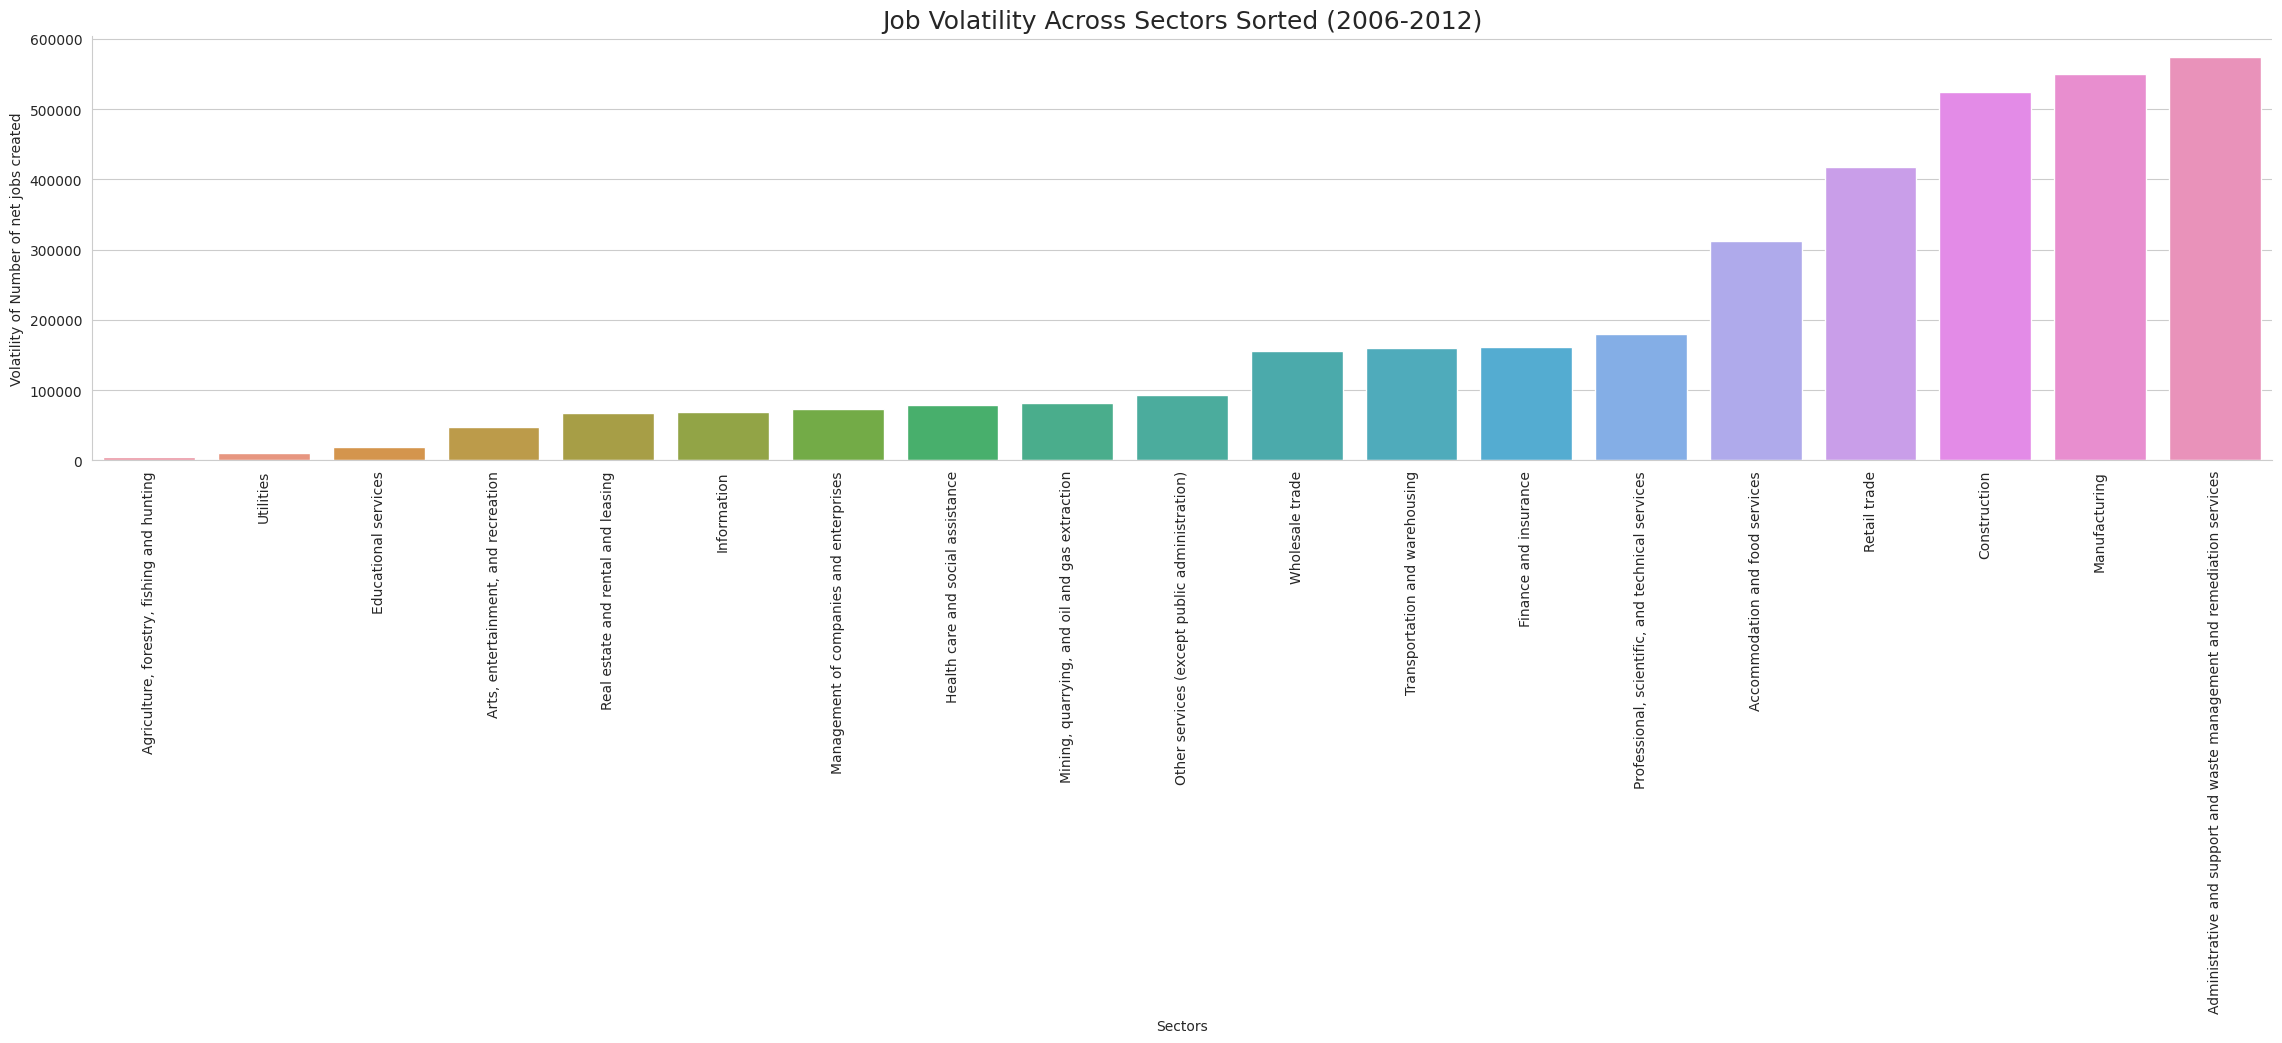

In [ ]:
#Plotting the bar plot
df_volatility = year_06_12[year_06_12["Geographic Area Name"] == "United States"]
df_volatility = df_volatility[df_volatility["Meaning of NAICS Code"] != "Total for all sectors"]

df_volatility = df_volatility.groupby(["Meaning of NAICS Code"])["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"].std()
df_volatility = pd.DataFrame({"Volatility":df_volatility})
df_volatility.reset_index(inplace = True)
df_volatility_by_sector=df_volatility.sort_values(by='Volatility', ascending=True)

top5_volatility_by_sector = df_volatility_by_sector.nlargest(5,"Volatility")
bottom5_volatility_by_sector = df_volatility_by_sector.nsmallest(5,"Volatility")

fig1=sns.catplot(x="Meaning of NAICS Code", y="Volatility", data=df_volatility_by_sector,kind="bar", aspect=5);
fig1.set_xticklabels(rotation=90);
plt.ylabel('Volatility of Number of net jobs created', fontsize=10);
plt.xlabel('Sectors', fontsize=10)
plt.title("Job Volatility Across Sectors Sorted (2006-2012)", fontsize=18);



# **Insights  from the bar plot**

This graphs is clear in terms of the volatality in each sector.

**Hence, answering the questions - Agriculture, Utilities and Educational sectors were the least and Admin, Manufacturing and Construction were the most affected by the recession period.**

As we can see from the plot above, the **construction** sector took a major hit with the recession. The same can be verified with a report from CNBC  https://www.cnbc.com/2012/06/01/Industries-Hit-Hardest-by-the-Recession.html

#**Trend of GDP over the time across states between 1998 and 2020**

Moving forward with our analysis, we'll try to see which states have notable improvement in GDP relatively and try to answer the following question.

**Question - Which states have seen a noticible improvement in GDP between the years 1998 and 2020?**

In [ ]:
#Loading the geojson file
geojson_url = 'https://github.com/ltrucios/BA780_GroupAssigment_Group09/raw/main/Datasets/us-states.json'

#Reference from ChatGPT
# Fetch the GeoJSON data from the URL
response = requests.get(geojson_url)
us_states = response.json()

# Filter your DataFrame and convert 'Year' to a string
filtered_data = df_merged.copy()
filtered_data = filtered_data[(filtered_data["Geographic Area Name"] != "United States") &
                        (filtered_data["Meaning of NAICS Code"] != "Total for all sectors") &
                        (filtered_data["Year"] >= 1998)]
filtered_data['Year'] = filtered_data['Year'].astype(str)

# Converts geographic area names into corresponding codes for importing
state_region_map = {
    "Alabama":"AL","Alaska":"AK","Arizona":"AZ","Arkansas":"AR","California":"CA","Colorado":"CO","Connecticut":"CT","Delaware":"DE","Washington DC":"DC","Florida":"FL","Georgia":"GA","Hawaii":"HI","Idaho":"ID",
    "Illinois":"IL","Indiana":"IN","Iowa":"IA","Kansas":"KS","Kentucky":"KY","Louisiana":"LA","Maine":"ME","Maryland":"MD","Massachusetts":"MA","Michigan":"MI","Minnesota":"MN","Mississippi":"MS","Missouri":"MO",
    "Montana":"MT","Nebraska":"NE","Nevada":"NV","New Hampshire":"NH","New Jersey":"NJ","New Mexico":"NM","New York":"NY","North Carolina":"NC","North Dakota":"ND","Ohio":"OH","Oklahoma":"OK","Oregon":"OR",
    "Pennsylvania":"PA","Rhode Island":"RI","South Carolina":"SC","South Dakota":"SD","Tennessee":"TN","Texas":"TX","Utah":"UT","Vermont":"VT","Virginia":"VA","Washington":"WA","West Virginia":"WV",
    "Wisconsin":"WI","Wyoming":"WY"}
filtered_data['Geographic Area Name']=filtered_data['Geographic Area Name'].replace(state_region_map)

#Reference from ChatGPT
# Create the choropleth map
fig = px.choropleth(
    filtered_data,
    locations="Geographic Area Name",
    locationmode="USA-states",
    geojson=us_states,
    color="GDP",
    scope="usa",  # Map scope (USA)
    hover_name="Geographic Area Name",
    color_continuous_scale="Blues",
    title="State-wise Real GDP",
    range_color=[0, 1000000],
    animation_frame='Year'
)

fig.show()


# **Insights  from the HeatMap**

The chart indicates that over the years, the states NY, CA, TX, and FL consistently have the highest GDP. Notably, FL has experienced nearly a 100% increase in GDP since 1998.

We'll further look to understand how has the the death of firms affected the GDP

# **Understanding the correlation between Firm Deaths and GDP between 1998 and 2020**



Moving forward, we're keen to see how the death of firms has affected the GDP on a highlevel. So by the end of this analysis we'll try to answer the following question

**Question -  What is the correlation between the death of firms and GDP?**
In other words, how is GDP affected by the death of firms over the years?

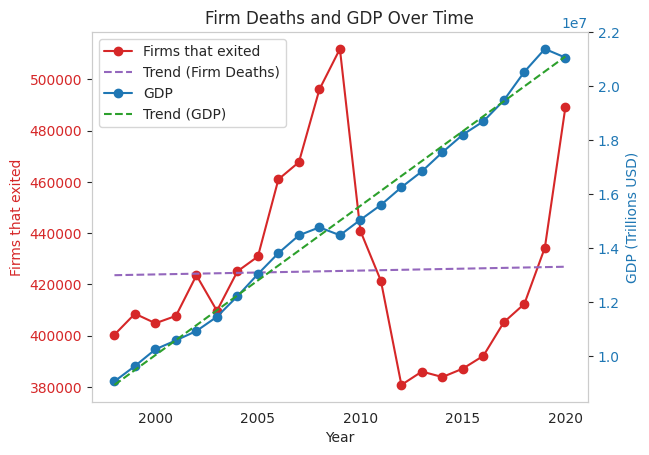

<Figure size 3000x3000 with 0 Axes>

In [ ]:
df_merged_us = df_merged[(df_merged["Year"]>=1998)&(df_merged["Year"]<=2020)]
df_merged_us = df_merged_us[df_merged_us["Geographic Area Name"] == "United States"]
df_merged_us = df_merged_us[df_merged_us["Meaning of NAICS Code"] == "Total for all sectors"]

# Sample data for firm deaths and GDP
years = df_merged_us['Year']
firm_deaths = df_merged_us['Number of firms that exited during the last 12 months']
gdp = df_merged_us['GDP']


fig, ax1 = plt.subplots()

# Ploting Number of firms that exited during the last 12 months
ax1.set_xlabel('Year')
ax1.set_ylabel('Firms that exited', color='tab:red')
ax1.plot(years, firm_deaths, color='tab:red', marker='o', label='Firms that exited')
ax1.tick_params(axis='y', labelcolor='tab:red')

#Trend Analysis of Number of firms that exited during the last 12 months
slope_deaths, intercept_deaths, _, _, _ = linregress(years, firm_deaths)
trend_deaths = slope_deaths * years + intercept_deaths
ax1.plot(years, trend_deaths, linestyle='--', color='tab:purple', label='Trend (Firm Deaths)')

# Second y-axis to plot GDP
ax2 = ax1.twinx()
ax2.set_ylabel('GDP (Trillions USD)', color='tab:blue')
ax2.plot(years, gdp, color='tab:blue', marker='o', label='GDP')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Calculate and plot the trendline for GDP
slope_gdp, intercept_gdp, _, _, _ = linregress(years, gdp)
trend_gdp = slope_gdp * years + intercept_gdp
ax2.plot(years, trend_gdp, linestyle='--', color='tab:green', label='Trend (GDP)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Add a title and labels
plt.title('Firm Deaths and GDP Over Time')
plt.xlabel('Year')

# Display the plot
ax1.grid(False)
ax2.grid(False)
plt.figure(figsize=(30, 30))
plt.show();


# **Insights  from the lineplot**

The above plot is a clear indication of the inverse correlation between the number of firms deaths and the GDP measured over a period of time.
The highest and lowest of the Firm Deaths and Real GDP, respectively, are witnessed during the recession time frame of 2007-2010.


# **Conclusion**

*Unraveling the US Economy (2000-2020)*

Our journey through the US economy from 2000 to 2020 unveiled some fascinating stories. One of the most striking tales was the dip during the 2008 recession, impacting both jobs and the overall economy. Although GDP and the number of businesses grew since 2000, job creation didn't keep up.

When we looked closer at the recession years, we discovered that some job sectors remained stable, like Agriculture, Utilities, and Education, while others, such as Administrative, Manufacturing, and Construction, faced more ups and downs.

As we traveled through states and their GDP, some states consistently stood out as leaders, like New York, California, and Texas. Florida, in particular, impressed us with its nearly doubled GDP over the course.

Lastly, we explored how firm closures and GDP are connected. It turns out that when businesses struggled during the recession, it had a noticeable impact on the economy. The more firms closed, the lower the GDP.

In simple terms, our analysis illuminated the US economy's ups and downs, showcasing its resilience, differences between job sectors, and the tightrope walk between business health and economic prosperity. These insights provide us with valuable guidance as we navigate the complex world of economics.


# **Acknowledgments**

We would like to acknowledge the following  

1. ChatGPT from OpenAI for its assistance during the course of this project. ChatGPT aided us in three key instances:
* 		Plotting the Map Plot: ChatGPT provided guidance in understanding the approach to create and interpret map plots, enhancing the geographical aspect of our analysis.
* 		Highlighting Key Points: ChatGPT aided in highlighting the local maxima and minima an in our line graphs, making our insights more accessible and visually compelling.

* 		Graph Beautification: ChatGPT assisted in adjusting the formatting of float values for years on the X-axis, enhancing the clarity of several graphs.

2. Official documentation of Pandas, Numpy, Seaborn and Matplotlib for further clarification of functions/arguments.

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Filter the data
df_filtered = df_merged[(df_merged['Year'] >= 2000) & (df_merged['Year'] <= 2020)]
df_filtered = df_filtered.dropna(subset=['Region'])

# Unique years in your data
years = df_filtered['Year'].unique()

# Create subplots
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])

# Initialize data list
data = []

for year in years:
    year_data = df_filtered[df_filtered['Year'] == year]
    labels = year_data['Region']
    values = year_data['GDP']

    pie_chart = go.Pie(labels=labels, values=values, name=str(year))
    data.append(pie_chart)

# Add pie chart data to the subplot
for pie_chart in data:
    fig.add_trace(pie_chart)

# Define animation settings
animation_settings = {
    "frame": {"duration": 1000, "redraw": True},
    "fromcurrent": True,
}

# Create buttons to switch between years
buttons = [
    {
        "args": [f"[{year}]", {"frame": {"duration": 1000, "redraw": True}, "mode": "immediate", "transition": {"duration": 300}}],
        "label": str(year),
        "method": "animate",
    }
    for year in years
]

# Add animation buttons to the layout
fig.update_layout(
    updatemenus=[
        {
            "buttons": buttons,
            "direction": "left",
            "showactive": False,
            "type": "buttons",
        }
    ],
    sliders=[{
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Year:",
            "visible": True,
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "steps": [
            {
                "args": [
                    [str(year)],
                    animation_settings,
                ],
                "label": str(year),
                "method": "animate",
            }
            for year in years
        ],
    }],
)

# Update the layout to center the pie chart and make it larger
fig.update_layout(
    title="Interactive Pie Chart Over the Years",
    showlegend=False,
    width=1000,  # Set the width of the pie chart (adjust as needed)
    height=1000,  # Set the height of the pie chart (adjust as needed)
    margin=dict(l=0, r=0, t=0, b=0),  # Adjust the margin to center the pie chart
)

# Save the interactive pie chart as an HTML file
fig.write_html("interactive_pie_chart.html")

# Display the figure
fig.show()


In [ ]:
import plotly.graph_objects as go

labels = ['Category A', 'Category B', 'Category C']
values = [[30, 40, 30], [35, 25, 40], [25, 45, 30]]
years = [2020, 2021, 2022]

# Create a Pie chart for each year and add them to frames
frames = [go.Frame(data=[go.Pie(labels=labels, values=year_values, title=f'Year {year}')], name=f'Year {year}') for year, year_values in zip(years, values)]

# Create the figure
fig = go.Figure(data=[go.Pie(labels=labels, values=values[0], title='Year 2020')], frames=frames)

# Define animation settings
animation_settings = dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)

# Add animation buttons
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play', method='animate', args=[None, animation_settings])])])

fig.update_layout(title='Animated Pie Chart Over Years')
fig.update_layout(showlegend=False)

# Display the animated pie chart
fig.show()


In [ ]:
import pandas as pd


# Filter data for years 2000 to 2020
filtered_df = df_merged[(df_merged['Year'] >= 2000) & (df_merged['Year'] <= 2020)]

# Handle duplicates by aggregating (e.g., calculating the mean)
pivot_table = filtered_df.groupby(['Region', 'Year'])['GDP'].mean().unstack()

# Display the pivot table
print(pivot_table)


Year                2000           2001           2002           2003  \
Region                                                                  
Midwest    189201.625000  192859.175000  199658.316667  208102.633333   
Northeast  244532.455556  254205.288889  260006.144444  268722.744444   
South      194699.670588  203784.858824  211479.376471  223434.658824   
West       184917.830769  188396.138462  194646.976923  205350.384615   

Year                2004           2005           2006           2007  \
Region                                                                  
Midwest    219817.516667  230564.225000  239530.933333  249421.466667   
Northeast  284092.100000  298080.800000  313739.833333  328613.433333   
South      241226.035294  260923.676471  279014.488235  291716.682353   
West       218904.153846  236515.184615  253203.138462  267573.061538   

Year                2008           2009  ...           2011           2012  \
Region                                   ...

In [ ]:

# Filter data for years 2000 to 2020
filtered_df = df_merged[(df_merged['Year'] >= 2000) & (df_merged['Year'] <= 2020)]

# Handle duplicates by aggregating (e.g., calculating the mean)
pivot_table = filtered_df.groupby(['Region', 'Year'])['GDP'].mean().unstack()

# Get the unique years from the pivot table
years = pivot_table.columns

# Convert years to strings
year_strings = [str(year) for year in years]

# Create frames for the animation
frames = [go.Frame(
    data=[
        go.Pie(
            labels=pivot_table.index,
            values=pivot_table[year],
            title=f'Year {year}',
            legendgroup='GDP by Region',
            name=year_str
        )
    ]
) for year, year_str in zip(years, year_strings)]

# Create the figure
fig = go.Figure(data=[
    go.Pie(
        labels=pivot_table.index,
        values=pivot_table[years[0]],
        title=f'Year {years[0]}',
        legendgroup='GDP by Region',
        name=year_strings[0]
    )
], frames=frames)

# Define animation settings
animation_settings = dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)

# Add animation buttons
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play', method='animate', args=[None, animation_settings])])])

fig.update_layout(title='GDP by Regions over the years - 2000 to 2020')
fig.update_layout(showlegend=True)  # Show the legend

# Display the animated pie chart
fig.show()


In [ ]:
#Loading the geojson file
geojson_url = 'https://github.com/ltrucios/BA780_GroupAssigment_Group09/raw/main/Datasets/us-states.json'

#Reference from ChatGPT
# Fetch the GeoJSON data from the URL
response = requests.get(geojson_url)
us_states = response.json()

# Filter your DataFrame and convert 'Year' to a string
filtered_data = df_3.copy()
filtered_data = filtered_data[(filtered_data["Geographic Area Name"] != "United States") &
                              (filtered_data["Year"] >= 1998)]

filtered_data['Year'] = filtered_data['Year'].astype(str)

# Converts geographic area names into corresponding codes for importing
state_region_map = {
    "Alabama":"AL","Alaska":"AK","Arizona":"AZ","Arkansas":"AR","California":"CA","Colorado":"CO","Connecticut":"CT","Delaware":"DE","Washington DC":"DC","Florida":"FL","Georgia":"GA","Hawaii":"HI","Idaho":"ID",
    "Illinois":"IL","Indiana":"IN","Iowa":"IA","Kansas":"KS","Kentucky":"KY","Louisiana":"LA","Maine":"ME","Maryland":"MD","Massachusetts":"MA","Michigan":"MI","Minnesota":"MN","Mississippi":"MS","Missouri":"MO",
    "Montana":"MT","Nebraska":"NE","Nevada":"NV","New Hampshire":"NH","New Jersey":"NJ","New Mexico":"NM","New York":"NY","North Carolina":"NC","North Dakota":"ND","Ohio":"OH","Oklahoma":"OK","Oregon":"OR",
    "Pennsylvania":"PA","Rhode Island":"RI","South Carolina":"SC","South Dakota":"SD","Tennessee":"TN","Texas":"TX","Utah":"UT","Vermont":"VT","Virginia":"VA","Washington":"WA","West Virginia":"WV",
    "Wisconsin":"WI","Wyoming":"WY"}
filtered_data['Geographic Area Name']=filtered_data['Geographic Area Name'].replace(state_region_map)

#Reference from ChatGPT
# Create the choropleth map
fig = px.choropleth(
    filtered_data,
    locations="Geographic Area Name",
    locationmode="USA-states",
    geojson=us_states,
    color="Personal Income",
    scope="usa",  # Map scope (USA)
    hover_name="Geographic Area Name",
    color_continuous_scale="mint",
    title="State-wise Personal Income",
    range_color=[0, 1000000],
    animation_frame='Year'
)

fig.show()

In [ ]:
regions = df_merged['Region'].dropna()
df_merged['Average_GDP'] = df_merged.groupby('Region')['GDP'].mean()


In [ ]:
print(df_merged['Average_GDP'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
44715   NaN
44716   NaN
44717   NaN
44718   NaN
44719   NaN
Name: Average_GDP, Length: 44720, dtype: float64


In [ ]:
print(regions)

860      South
861      South
862      South
863      South
864      South
         ...  
44715     West
44716     West
44717     West
44718     West
44719     West
Name: Region, Length: 43860, dtype: object


In [ ]:
data = {'regions' : regions, 'GDP' : df_merged['Average_GDP']}
data['angle'] = [x / sum(df_merged['Average_GDP']) * 2 * pi for x in df_merged['Average_GDP']]
data['color'] = ['#f16e5e', '#f1c232']

fig = figure(height=350, title='GDP by regions', tools='hover', tooltips = "@regions: average_gdp", x_range=(-0.5, 1.0))
fig.annular_wedge(x=0, y=1, inner_radius=0.3, outer_radius=0.7,
                   start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
                   line_color="white", fill_color='color', legend_field='regions', source=data)

fig.title.text_font_size = "20px"

show(fig)


<ipython-input-40-4725a3cde0b6>:6: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('GDP', 44720), ('angle', 44720), ('color', 2), ('regions', 43860)

